#### Paper one
---
Modal disparities in spatiotemporal accessibility to non-work activities on the commute home from work in Warsaw, Poland
===

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

### parameters

In [2]:
B = 90
t_k = 20

### prepare

In [3]:
od_PuT = pd.read_csv('data//MTX_99321.csv')
del od_PuT['Unnamed: 0']
od_PuT.columns = [int(c) for c in od_PuT.columns]
od_PrT = pd.read_csv('data//MTX_99421.csv')
del od_PrT['Unnamed: 0']
od_PrT.columns = [int(c) for c in od_PrT.columns]
od_PrT = od_PrT.stack().reset_index()
od_PrT.columns=['Z_Rejon',"Do_Rejon", 'TripsPrT']
od_PuT = od_PuT.stack().reset_index()
od_PuT.columns=['Z_Rejon',"Do_Rejon", 'TripsPuT']
od = pd.merge(od_PrT, od_PuT, on = ['Z_Rejon', "Do_Rejon"])

In [4]:
od.Z_Rejon = od.Z_Rejon.astype('int32')
od.Do_Rejon=od.Do_Rejon.astype('int32')
od.TripsPrT=od.TripsPrT.astype('float32')
od.TripsPuT=od.TripsPuT.astype('float32')

In [6]:
usecols = ['Z_Rejon','POI','Do_Rejon','Czas_PrT','Czas_PuT']
dtype={'Unnamed: 0':'int32','Z_Rejon': 'int16',
       'Czas_PrT': 'float32',
 'Czas_PuT': 'float32',
 'Do_Rejon': 'int16',
 'POI': 'int16'}
trips = pd.read_csv('data//From_Via_To.csv', dtype = dtype)
del trips['Unnamed: 0']

In [7]:
trips.Czas_PrT = trips.Czas_PrT/60
trips.Czas_PuT = trips.Czas_PuT/60

In [8]:
trips = pd.merge(trips,od, on = ['Z_Rejon',"Do_Rejon"])

In [9]:
trips = trips[trips.TripsPuT>0]

In [10]:
trips = trips[['Z_Rejon','POI','Do_Rejon','Czas_PrT','Czas_PuT']]

In [11]:
trips.columns = ['j','k','i','t_jki_Car','t_jki_PT']

### data

In [12]:
trips.head()

,j,k,i,t_jki_Car,t_jki_PT
0,1,30,1,3.40,0.40
1,1,174,1,41.63,16.75
2,1,178,1,38.33,13.98
3,1,74,1,37.77,16.56
4,1,154,1,37.84,16.63


# 3.2.
The time-geographic accessibility of a person leaving work in zone j stopping at non-work location k on the way home in zone i is calculated as:

 $A_{jki} = max(0,B-(t_{jk}+t_{k}+t_{ki}))$  (1)

$B$ = travel time budget in minutes

$t_jk$  = travel time in minutes from work location j to non-work location k

$t_k$  = minimum time required to participate in activity at location k

$t_ki$  = travel time in minutes from non-work location k to home location i

$A_jki$  = number of minutes available for person working in location j and living in location i to consume goods or services at location k given available travel budget B and minimum activity duration $t_k$ .


In [13]:
trips['A_jki_Car'] = B - trips.t_jki_Car - t_k
trips.A_jki_Car[trips.A_jki_Car < 0] = 0
trips.A_jki_Car[trips.A_jki_Car > 0] = trips.A_jki_Car + t_k
trips['A_jki_PT'] = B - trips.t_jki_PT - t_k
trips.A_jki_PT[trips.A_jki_PT < 0] = 0
trips.A_jki_PT[trips.A_jki_PT > 0] = trips.A_jki_PT + t_k

C:\Users\Rafal\Anaconda2\envs\untitled3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rafal\Anaconda2\envs\untitled3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rafal\Anaconda2\envs\untitled3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Rafal\Ana

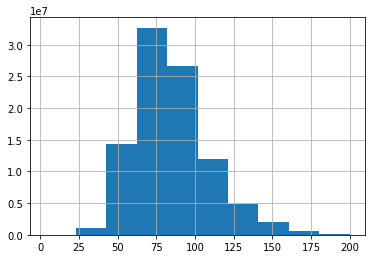

In [14]:
trips[trips['t_jki_Car']<200]['t_jki_Car'].hist()

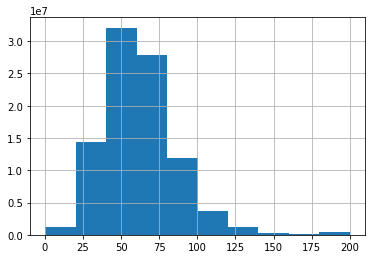

In [15]:
trips[trips['t_jki_PT']<200]['t_jki_PT'].hist()

The commute-based work-home accessibility, $A_{ji}^C$, is calculated by:

$A_{ji}^C = \frac{\sum_{k \in K} A_{jki}}{n} $ (2)

In [16]:
A_ji_C_Car = trips[trips.A_jki_Car>0].groupby(by=['i','j'])['A_jki_Car'].agg(['mean','min','max','std'])
A_ji_C_Car.to_csv('data//A_ji_C_Car.csv')
A_ji_C_Car.head()

mean   min   max  std
i j                       
1 1 36.78 20.27 86.60 9.88
  2 39.70 20.58 65.77 9.02
  3 36.84 20.15 75.60 9.71
  4 35.80 20.48 75.60 9.08
  5 36.87 20.29 74.60 9.43

In [17]:
A_ji_C_PT = trips[trips.A_jki_PT>0].groupby(by=['i','j'])['A_jki_PT'].agg(['mean','min','max','std'])
A_ji_C_Car.to_csv('data//A_ji_C_Car.csv')
A_ji_C_PT.to_csv('data//A_ji_C_PT.csv')
A_ji_C_PT.head()

mean   min   max   std
i j                        
1 1 52.43 21.03 89.60 14.49
  2 52.21 20.53 89.11 14.41
  3 52.72 20.11 84.81 14.42
  4 52.34 20.62 83.21 14.43
  5 53.64 20.57 84.10 14.60

Similarly, the commute-based home accessibility, $A_i^C$, is calculated by:

$A_{i}^C = \frac{\sum_{k \in K} A_{jki}}{n} $ (3)

In [18]:
A_i_C_Car = trips[trips.A_jki_Car>0].groupby(by=['i'])['A_jki_Car'].agg(['mean','min','max','std'])
A_i_C_Car.to_csv('data//A_i_C_Car.csv')
A_i_C_Car.head()

,mean,min,max,std
i,,,,
1,32.77,20.00,86.60,8.45
2,33.38,20.00,74.68,8.46
3,32.51,20.00,74.84,8.16
4,31.40,20.00,75.60,7.82
5,33.73,20.00,72.19,8.78


In [19]:
A_i_C_PT = trips[trips.A_jki_PT>0].groupby(by=['i'])['A_jki_PT'].agg(['mean','min','max','std'])
A_i_C_PT.to_csv('data//A_i_C_PT.csv')
A_i_C_PT.head()

,mean,min,max,std
i,,,,
1,43.81,20.00,89.60,12.61
2,44.02,20.00,89.26,12.71
3,46.31,20.00,85.60,12.99
4,46.31,20.00,86.43,12.98
5,47.17,20.00,85.71,13.21


# 3.3 Home-based accessibility

For comparisons with previous modal accessibility disparity studies described earlier, a time-geographic accessibility metric is developed to measure the time available to consume goods or services at location k based on a trip from and to the home location i. The number of minutes available on a home-based trip, A_iki^ , is calculated by:

$A_{iki} = max(0,B-(t_{ik}+t_{k}+t_{ki}))$ (4)

In [20]:
hb = trips[trips.i == trips.j]

$A_{i}^H = \frac{\sum_{k \in K} A_{iki}}{n} $ (5)

In [21]:
A_i_H_Car = hb[hb.A_jki_Car>0].groupby(by=['i'])['A_jki_Car'].agg(['mean','min','max','std'])
A_i_H_Car.to_csv('data//A_i_H_Car.csv')
A_i_H_Car.head()

,mean,min,max,std
i,,,,
1,36.78,20.27,86.60,9.88
2,40.84,22.25,63.68,8.67
3,36.35,20.04,63.84,9.37
4,34.15,20.04,64.60,9.16
5,38.61,20.69,58.70,9.38


In [22]:
A_i_H_PT = hb[hb.A_jki_PT>0].groupby(by=['i'])['A_jki_PT'].agg(['mean','min','max','std'])
A_i_H_PT.to_csv('data//A_i_H_PT.csv')
A_i_H_PT.head()

,mean,min,max,std
i,,,,
1,52.43,21.03,89.60,14.49
2,52.05,20.76,88.78,14.97
3,55.38,22.19,81.38,14.66
4,55.24,23.75,81.79,14.40
5,57.24,21.84,83.94,15.13


# 3.4 Modal accessibility disparity
We use both zonal measures of accessible time to derive metrics of the disparity between automobiles and public transit. We use a standardized disparity measure based on Kwok & Yeh (2004). The zonal commute-based modal disparity is given by:

$X^C_i = \frac{A_i^{C,PT}-A_i^{C,Car}}{A_i^{C,PT}+A_i^{C,Car}}$ (6)

In [23]:
X_i_C = pd.DataFrame((A_i_C_PT['mean'] - A_i_C_Car['mean'] )/(A_i_C_PT['mean']  + A_i_C_Car['mean'] ))
X_i_C.to_csv('data//X_i_C.csv')
X_i_C.head()

,mean
i,
1,0.14
2,0.14
3,0.18
4,0.19
5,0.17


Tand the zonal home-trip-based modal disparity is given by:

$X^H_i = \frac{A_i^{H,PT}-A_i^{H,Car}}{A_i^{H,PT}+A_i^{H,Car}}$  (7)

In [24]:
X_i_H = pd.DataFrame((A_i_H_PT['mean'] - A_i_H_Car['mean'])/(A_i_H_PT['mean'] + A_i_H_Car['mean']))
X_i_C.to_csv('data//X_i_H.csv')
X_i_C.head()

,mean
i,
1,0.14
2,0.14
3,0.18
4,0.19
5,0.17


We also calculate the regional average for each accessibility and disparity metric for single values that describe the whole city. They are:

$A^{C,PT} = 1/W \sum_i W_i \times A^{C,PT}_i$ 

In [25]:
W_s = pd.read_csv('data//10000.csv')
del W_s['Unnamed: 0']

In [26]:
W_s = W_s.groupby('Z_Rejon')['TripsPrT'].sum()
W = W_s.sum()